In [20]:
# !kaggle competitions download -c tabular-playground-series-jul-2022

In [21]:
# from zipfile import ZipFile

In [22]:
# with ZipFile('tabular-playground-series-jul-2022.zip', 'r') as zipObj:
#     zipObj.extractall()

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
sns.set_theme()

In [25]:
df = pd.read_csv("data.csv")
df

,id,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,...,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28
0,0,-0.389420,-0.912791,0.648951,0.589045,-0.830817,0.733624,2.258560,2,13,...,-0.478412,-0.757002,-0.763635,-1.090369,1.142641,-0.884274,1.137896,1.309073,1.463002,0.813527
1,1,-0.689249,-0.453954,0.654175,0.995248,-1.653020,0.863810,-0.090651,2,3,...,-0.428791,-0.089908,-1.784204,-0.839474,0.459685,1.759412,-0.275422,-0.852168,0.562457,-2.680541
2,2,0.809079,0.324568,-1.170602,-0.624491,0.105448,0.783948,1.988301,5,11,...,-0.413534,-1.602377,1.190984,3.267116,-0.088322,-2.168635,-0.974989,1.335763,-1.110655,-3.630723
3,3,-0.500923,0.229049,0.264109,0.231520,0.415012,-1.221269,0.138850,6,2,...,0.619283,1.287801,0.532837,1.036631,-2.041828,1.440490,-1.900191,-0.630771,-0.050641,0.238333
4,4,-0.671268,-1.039533,-0.270155,-1.830264,-0.290108,-1.852809,0.781898,8,7,...,-1.628830,-0.434948,0.322505,0.284326,-2.438365,1.473930,-1.044684,1.602686,-0.405263,-1.987263
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97995,97995,0.237591,1.657034,-0.689282,0.313710,-0.299039,0.329139,1.607378,5,7,...,-0.290116,-0.258141,-0.973640,1.369508,0.391055,2.152426,-0.208944,-1.475403,0.298448,0.445039
97996,97996,0.322696,0.710411,0.562625,-1.321713,-0.357708,0.182024,0.178558,3,9,...,0.117687,1.388242,0.342400,1.680537,-0.860409,0.579165,1.162692,0.134994,0.994666,0.727642
97997,97997,-0.249364,-0.459545,1.886122,-1.340310,0.195029,-0.559520,-0.379767,8,9,...,-0.850223,-1.787648,-1.268115,-1.508330,1.945622,1.503645,0.194968,2.142693,1.646042,0.641466
97998,97998,0.311408,2.185237,0.761367,0.436723,0.464967,0.062321,-0.334025,1,8,...,-0.010839,1.118906,1.565765,0.358480,0.547615,1.224439,-0.537998,-1.610954,-0.616227,-0.066211


In [26]:
def plot_feature_distribution(df):
    fig, axes = plt.subplots(5, 6, figsize=(20,20))
    fig.suptitle("Distribution of all features")

    for i, col in enumerate(df.columns[1:]):
        plt.subplot(5,6,i+1)
        sns.histplot(data=df, x=col)
        plt.tick_params(axis="both", left=False, bottom=False, labelleft=False)
        plt.ylabel("")

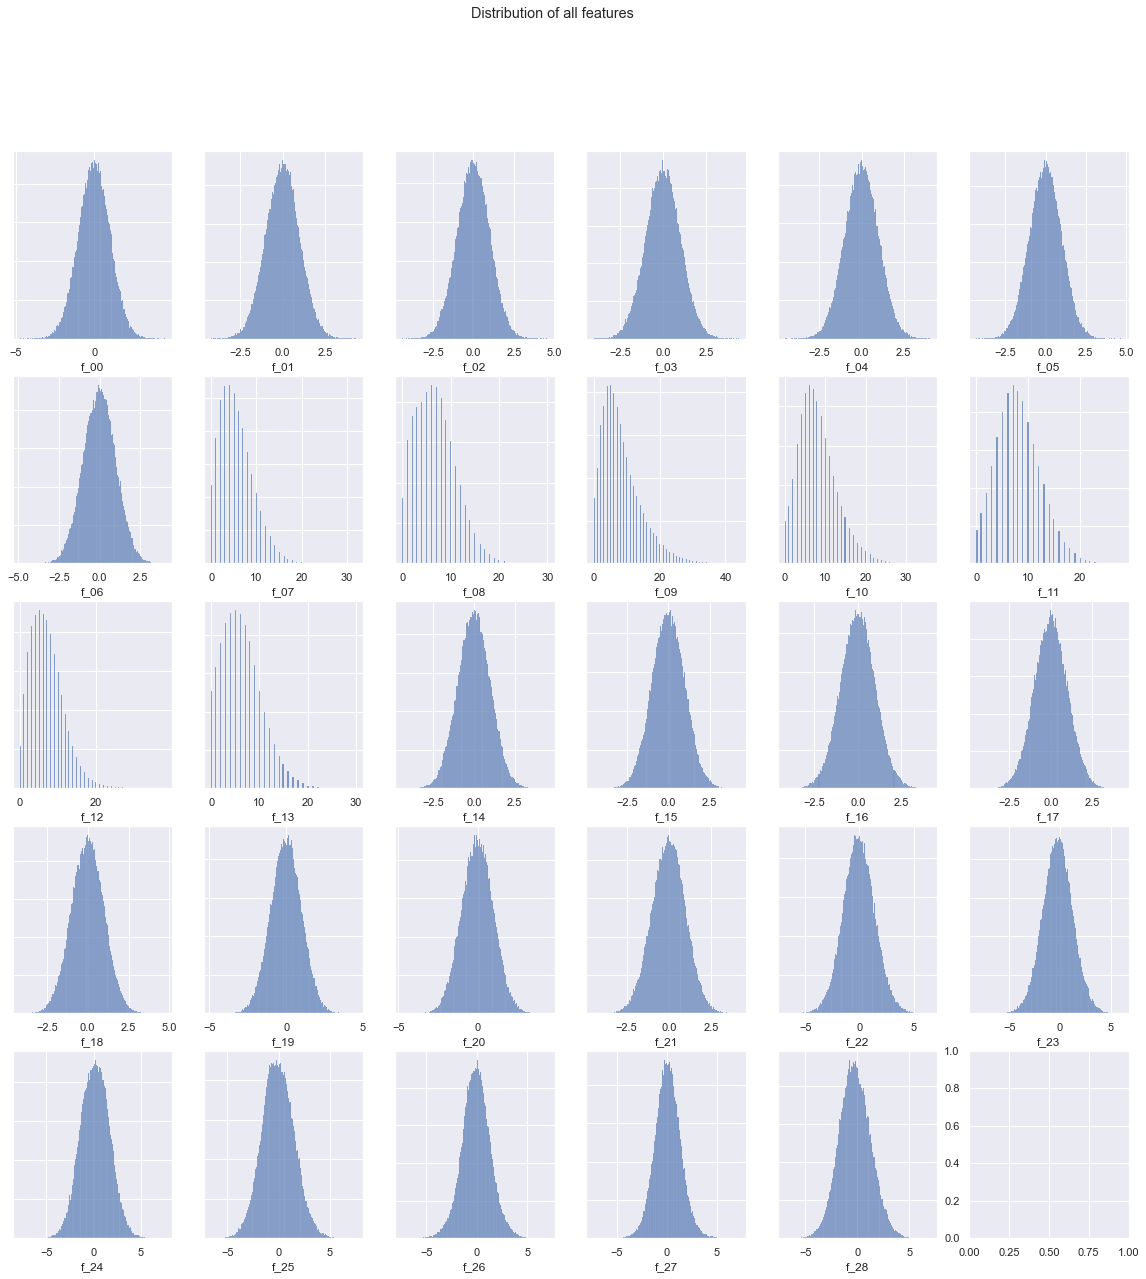

In [27]:
plot_feature_distribution(df)

In [28]:
from feature_engine.selection import DropDuplicateFeatures, DropConstantFeatures, DropCorrelatedFeatures

In [29]:
cols_dupl = DropDuplicateFeatures(variables=None)
cols_const = DropConstantFeatures(tol=0.99, variables=None)
cols_corr = DropCorrelatedFeatures(threshold=0.85, method='pearson')
cols_to_del = set()

In [30]:
def preprocess_data(df):
    global cols_dupl, cols_const, cols_corr, cols_to_del
    cols_const.fit(df)
    cols_to_del = cols_to_del.union(cols_const.features_to_drop_)
    cols_dupl.fit(df)
    cols_to_del = cols_to_del.union(cols_dupl.features_to_drop_)
    cols_corr.fit(df)
    cols_to_del = cols_to_del.union(cols_corr.features_to_drop_)
    
    df.drop(columns=cols_to_del, inplace=True, axis=1)
    return df

In [31]:
preprocess_data(df)

,id,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,...,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28
0,0,-0.389420,-0.912791,0.648951,0.589045,-0.830817,0.733624,2.258560,2,13,...,-0.478412,-0.757002,-0.763635,-1.090369,1.142641,-0.884274,1.137896,1.309073,1.463002,0.813527
1,1,-0.689249,-0.453954,0.654175,0.995248,-1.653020,0.863810,-0.090651,2,3,...,-0.428791,-0.089908,-1.784204,-0.839474,0.459685,1.759412,-0.275422,-0.852168,0.562457,-2.680541
2,2,0.809079,0.324568,-1.170602,-0.624491,0.105448,0.783948,1.988301,5,11,...,-0.413534,-1.602377,1.190984,3.267116,-0.088322,-2.168635,-0.974989,1.335763,-1.110655,-3.630723
3,3,-0.500923,0.229049,0.264109,0.231520,0.415012,-1.221269,0.138850,6,2,...,0.619283,1.287801,0.532837,1.036631,-2.041828,1.440490,-1.900191,-0.630771,-0.050641,0.238333
4,4,-0.671268,-1.039533,-0.270155,-1.830264,-0.290108,-1.852809,0.781898,8,7,...,-1.628830,-0.434948,0.322505,0.284326,-2.438365,1.473930,-1.044684,1.602686,-0.405263,-1.987263
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97995,97995,0.237591,1.657034,-0.689282,0.313710,-0.299039,0.329139,1.607378,5,7,...,-0.290116,-0.258141,-0.973640,1.369508,0.391055,2.152426,-0.208944,-1.475403,0.298448,0.445039
97996,97996,0.322696,0.710411,0.562625,-1.321713,-0.357708,0.182024,0.178558,3,9,...,0.117687,1.388242,0.342400,1.680537,-0.860409,0.579165,1.162692,0.134994,0.994666,0.727642
97997,97997,-0.249364,-0.459545,1.886122,-1.340310,0.195029,-0.559520,-0.379767,8,9,...,-0.850223,-1.787648,-1.268115,-1.508330,1.945622,1.503645,0.194968,2.142693,1.646042,0.641466
97998,97998,0.311408,2.185237,0.761367,0.436723,0.464967,0.062321,-0.334025,1,8,...,-0.010839,1.118906,1.565765,0.358480,0.547615,1.224439,-0.537998,-1.610954,-0.616227,-0.066211


In [32]:
from sklearn.cluster import KMeans

In [33]:
X = df
wcss = []
models = []
for i in range(1, 11):
    model = KMeans(n_clusters=i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    model.fit(X)
    models.append(model)
    wcss.append(model.inertia_)
    print(f"Learning of k-means model with n_clusters = {i} has ended")

Learning of k-means model with n_clusters = 1 has ended
Learning of k-means model with n_clusters = 2 has ended
Learning of k-means model with n_clusters = 3 has ended
Learning of k-means model with n_clusters = 4 has ended
Learning of k-means model with n_clusters = 5 has ended
Learning of k-means model with n_clusters = 6 has ended
Learning of k-means model with n_clusters = 7 has ended
Learning of k-means model with n_clusters = 8 has ended
Learning of k-means model with n_clusters = 9 has ended
Learning of k-means model with n_clusters = 10 has ended


Text(0, 0.5, 'wcss')

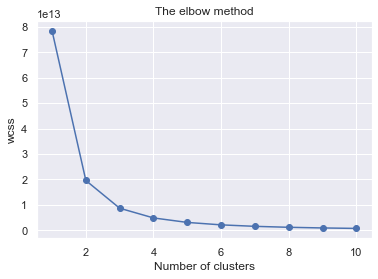

In [34]:
plt.plot(range(1,11), wcss, marker="o")
plt.title("The elbow method")
plt.xlabel("Number of clusters")
plt.ylabel("wcss")

In [35]:
Y = models[6].predict(X)
solution = pd.DataFrame({"Id": df["id"], "Predicted": Y})
solution.to_csv("submission.csv", sep=",", index=False)